# homework of week1

## 基本操作

In [2]:
import cv2
import matplotlib.pyplot as plt

def t2s(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

img = cv2.imread("../week1/week1_homework.png")


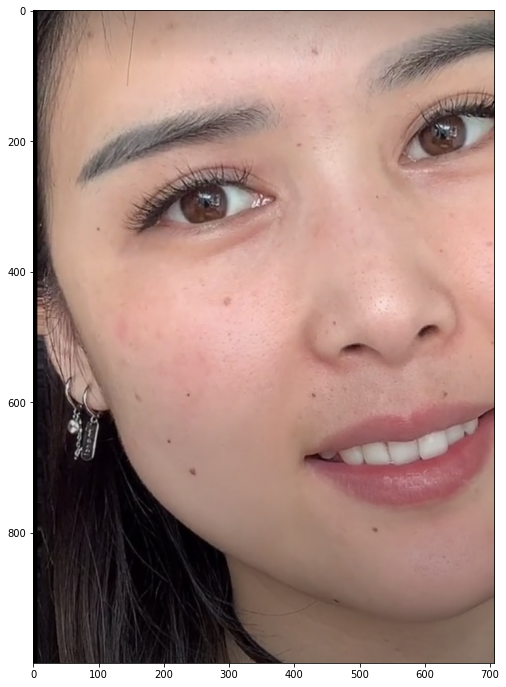

In [7]:
plt.figure(figsize=(12,12))
plt.imshow(t2s(img))
#plt.imshow(img)

plt.show()

In [40]:
import numpy as np
kernel = np.ones((13,13),np.float32)/(13*13)
#kernel[0,:]=[-1,0,1]
#kernel[1,:]=[-1,0,1]
#kernel[2,:]=[-1,0,1]

#kernel[0,:]=[0.1,0.1,0.1]
#kernel[1,:]=[0.1,0.2,0.1]
#kernel[2,:]=[0.1,0.1,0.1]
print(kernel)

SyntaxError: invalid character in identifier (<ipython-input-40-fa97412af5c8>, line 2)

(1000, 707, 3)
[255 255 255]


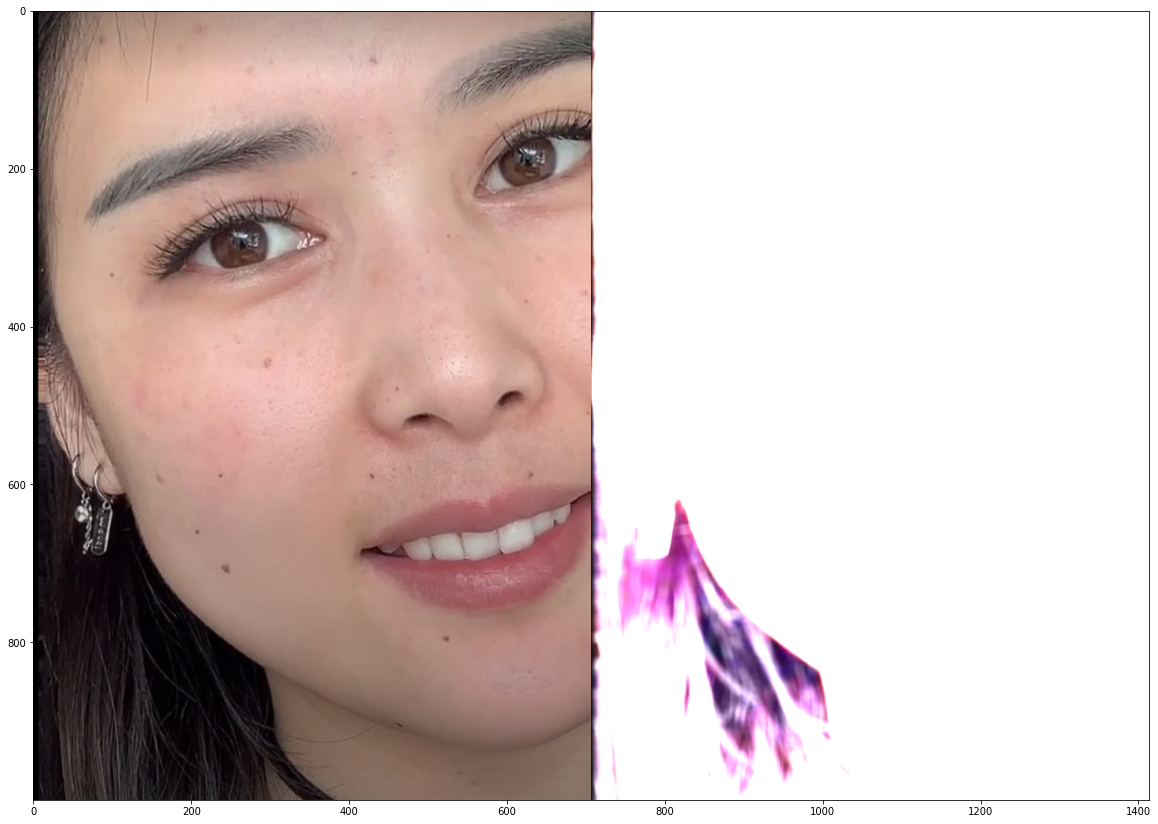

In [39]:

#dst=cv.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])；当ddepth=-1时，表示输出图像与原图像有相同的深度。
print(img.shape)
result = cv2.filter2D(img,-1,kernel)
result.shape
print(result[300,300])
plt.figure(figsize=(20,20))
plt.imshow(t2s(cv2.hconcat([img,result])))
plt.show()

## 看不出明显效果，更大滤波核，更多次滤波

In [29]:
kernel = np.ones((21,21),np.float32)/(21*21)


img1 = cv2.filter2D(img,-1,kernel)
#rmg1 = cv2.filter2D(img1,-1,kernel)
#rmg1 = cv2.filter2D(img1,-1,kernel)
#rmg1 = cv2.filter2D(img1,-1,kernel)
#rmg1 = cv2.filter2D(img1,-1,kernel)
result = cv2.filter2D(img1,-1,kernel)

### 显示滤波前后对比图

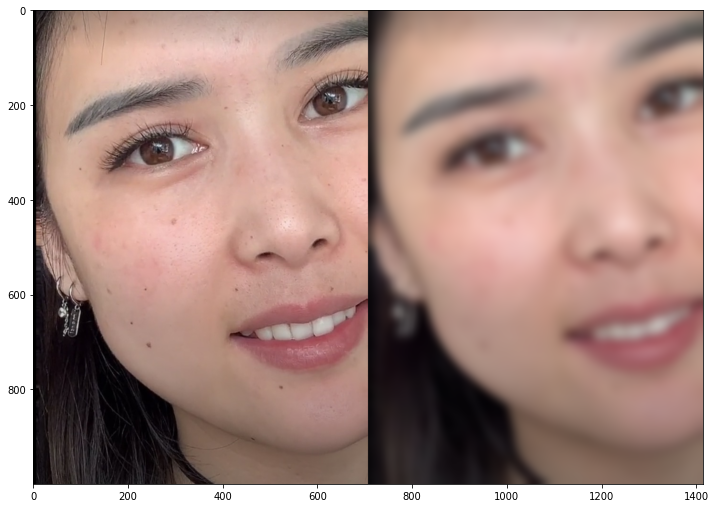

In [30]:
plt.figure(figsize=(12,12))
plt.imshow(t2s(cv2.hconcat([img,result])))
plt.show()

### 只对肤色区域进行滤波

In [31]:
result_show=result.copy()
# 肤色检测
# 来源 https://www.cnblogs.com/demodashi/p/9437559.html
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # 把图像转换到HSV色域
(_h, _s, _v) = cv2.split(hsv) # 图像分割, 分别获取h, s, v 通道分量图像
skin3 = np.zeros(_h.shape, dtype=np.uint8)  # 根据源图像的大小创建一个全0的矩阵,用于保存图像数据
(x, y) = _h.shape # 获取源图像数据的长和宽

# 遍历图像, 判断HSV通道的数值, 如果在指定范围中, 则置把新图像的点设为255,否则设为0
for i in  range(0, x):
    for j in  range(0, y):
        if (_h[i][j] >  5) and (_h[i][j] <  70) and (_s[i][j] >  18) and (_s[i][j] <  255) and (_v[i][j] >  50) and (_v[i][j] <  255):
            skin3[i][j] =  255
            #result[i][j]=img[i][j]
        else:
            skin3[i][j] =  0
            result_show[i][j]=img[i][j]

#cv2.imshow(imname, img)
#cv2.imshow(imname +  " Skin3 HSV", skin3)
#cv2.imwrite("skin.png",skin3)
#import os
#os.system("open skin.png")
#cv2.imwrite("compare2.png",cv2.hconcat([img,result_show]))
#os.system("open compare2.png")

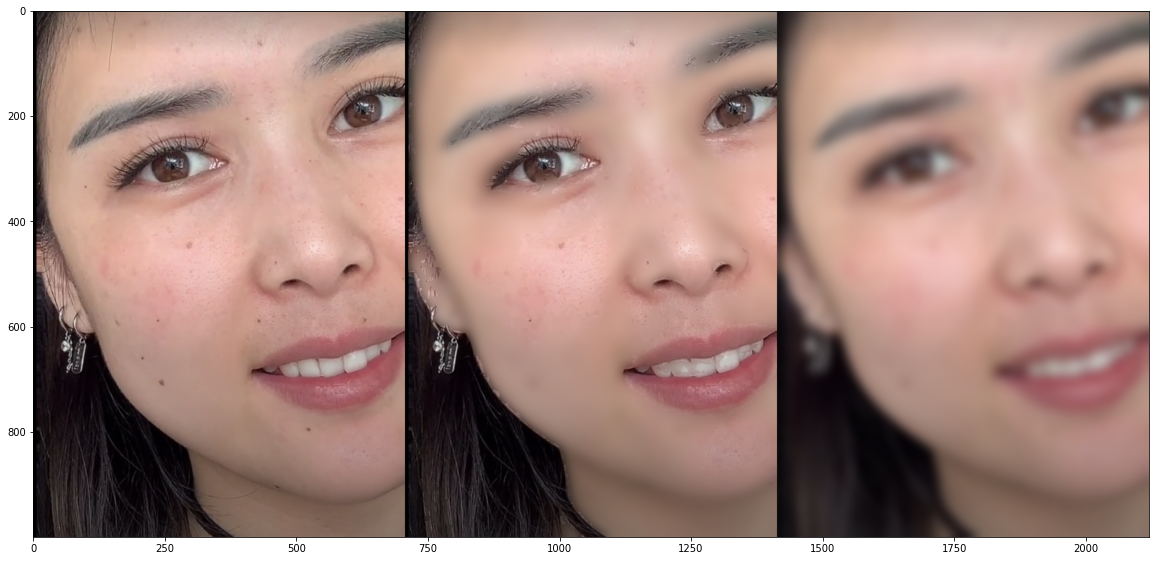

In [32]:
plt.figure(figsize=(20,20))
plt.imshow(t2s(cv2.hconcat([img,result_show,result])))
plt.show()

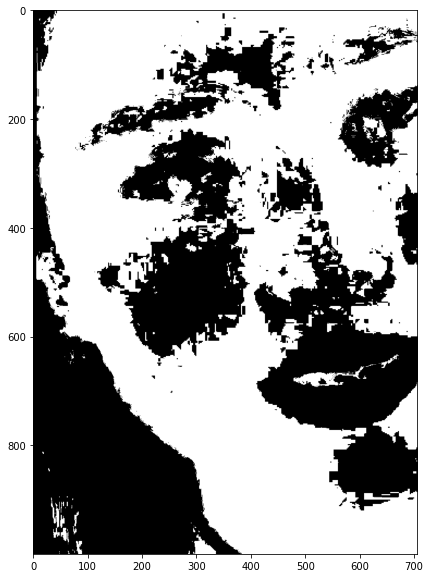

In [33]:
plt.figure(figsize=(10,10))
plt.imshow(t2s(skin3))
plt.show()

## 如何准确得到人脸五官区域？

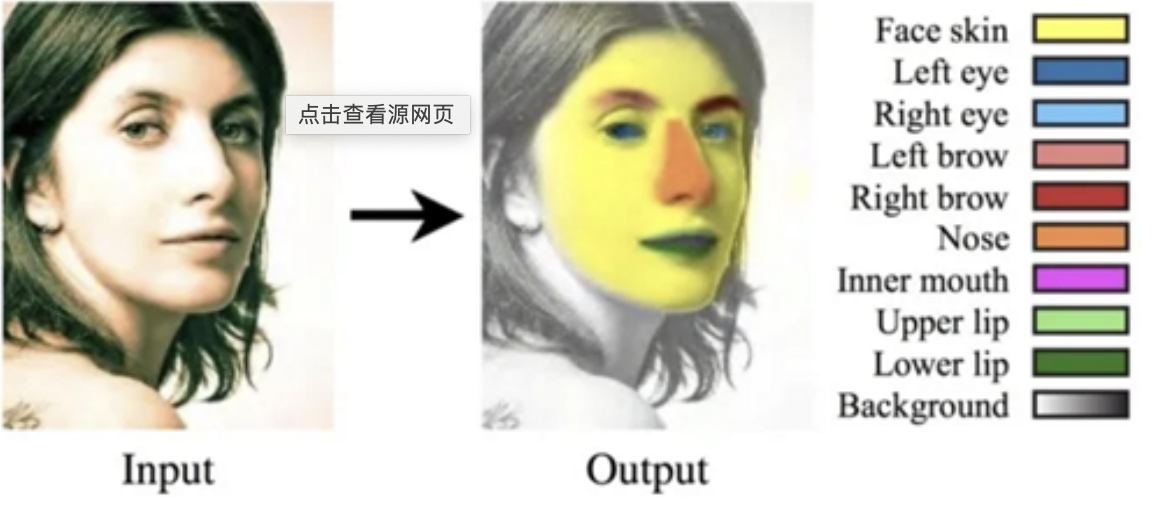

## 依赖人脸关键点

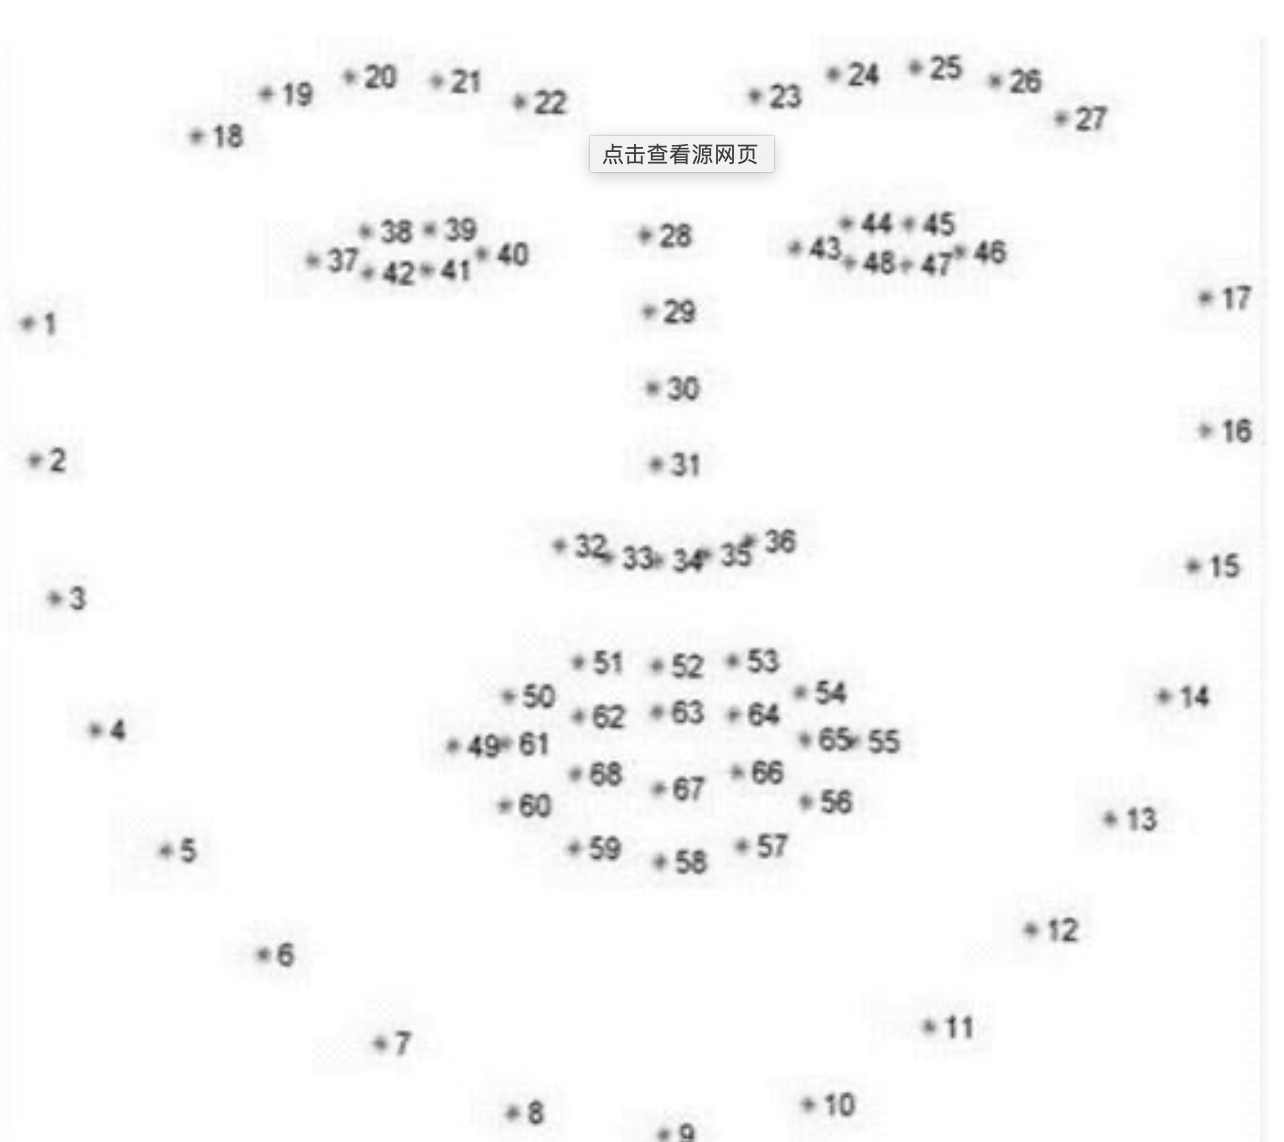

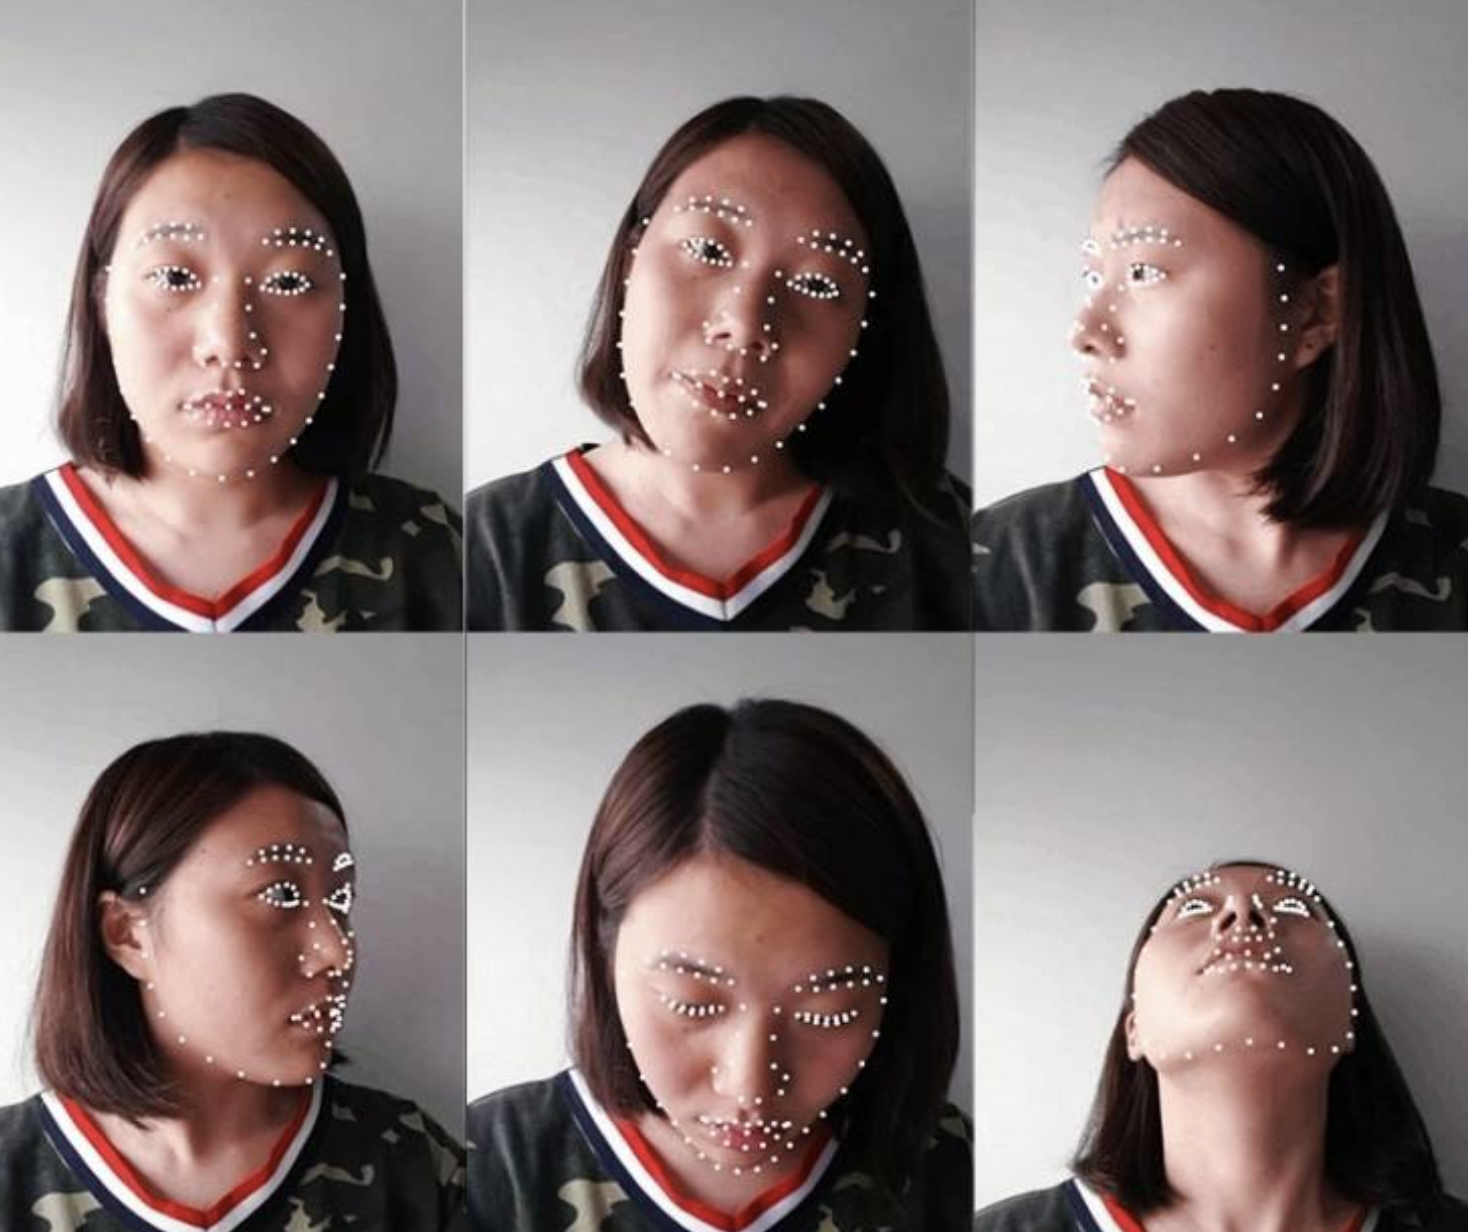

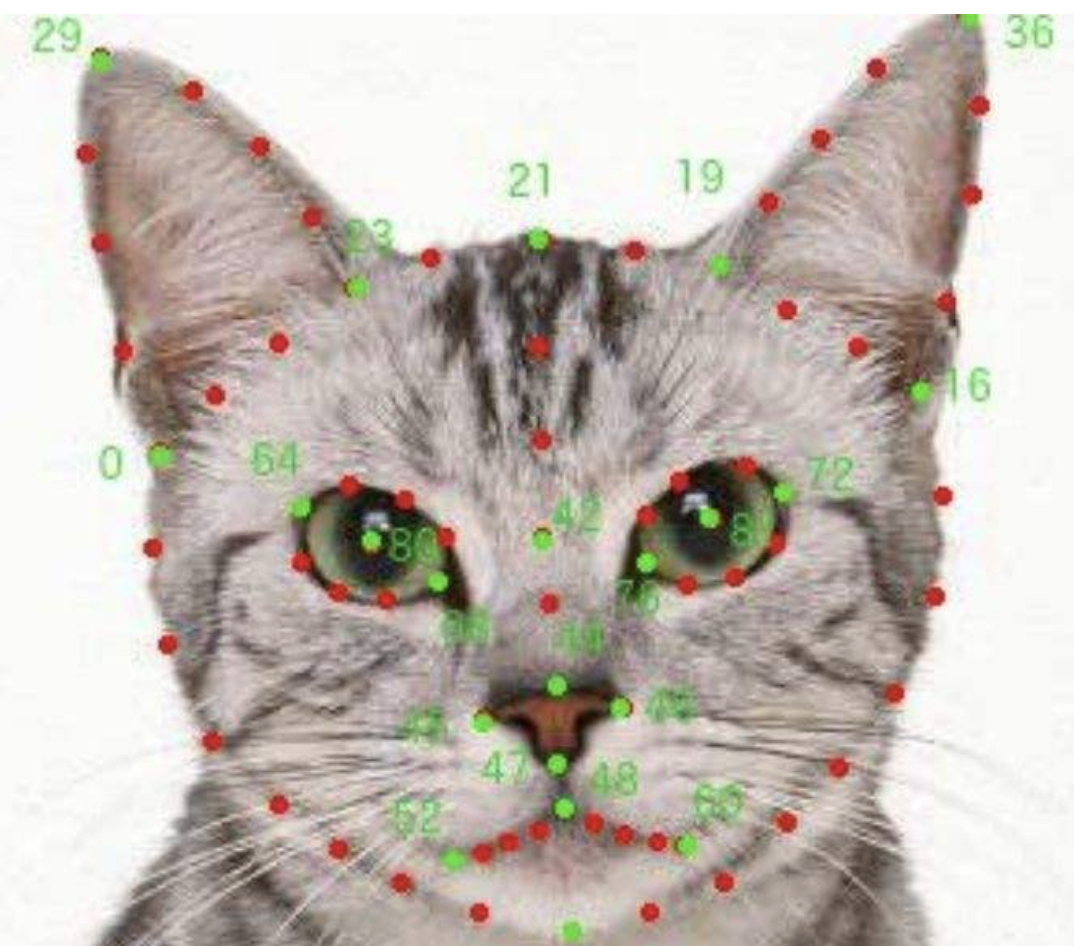

https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1592640538491&di=ee8686798b5801c4fa3053f07b9746f7&imgtype=0&src=http%3A%2F%2Fimg.mp.itc.cn%2Fupload%2F20161025%2Fb23072f3ee314b518d1bc85204e7c6ad.gif![image.png](attachment:image.png)

## 依赖深度学习语义分割模型